In [128]:
import matplotlib.pyplot as plt
from time import sleep, process_time
import random
import string
import numpy as np

In [181]:
def simple_string_compare(a, b):
    
    i = 0
    
    while i < len(a) and i < len(b):
        
        if a[i] != b[i]:
            return
        
        i += 1

In [184]:
allowed_characters = string.ascii_uppercase + string.ascii_lowercase + string.digits

In [185]:
def random_string(length):    
    return ''.join(random.choices(allowed_characters, k=length))

## Simple Timing

First we run the string comparison for first guesses with at least 12 of 24 characters correct.

In [183]:
unknown_password = random_string(24)

In [199]:
delta_ks = []

for _ in range(1000):
    
    guess_password_km1 = unknown_password[:12] + random_string(12)
    
    start = process_time()
    simple_string_compare(unknown_password, guess_password_km1)
    end = process_time()
    
    t_km1 = end - start
    
    for next_character in allowed_characters:
                
        guess_password_k = guess_password_km1[:12] + next_character + random_string(11)
                
        start = process_time()
        simple_string_compare(unknown_password, guess_password_k)
        end = process_time()
        
        t_k = end - start
                
        delta_ks += [(t_k - t_km1) * 1000000]

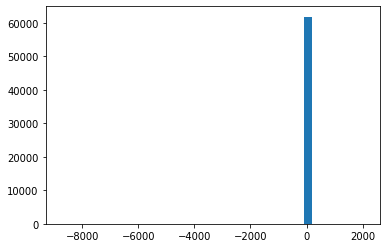

In [200]:
_ = plt.hist(delta_ks, bins=40)

Now we run the string comparison for guesses with at least 13 of 24 characters correct.

In [167]:
second_guess_times = []

for _ in range(1000000):
    
    guess_password = generate_guess(unknown_password, 24, 13)
    
    start = process_time()
    simple_string_compare(unknown_password, guess_password)
    end = process_time()
    
    second_guess_times += [end - start]

And plot the results.

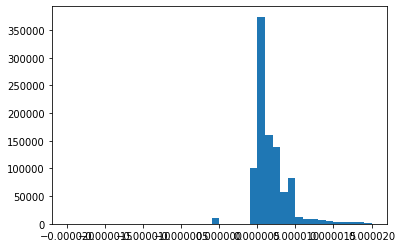

In [178]:
_ = plt.hist(first_guess_times, range=(-0.00002, 0.00002), bins=40)

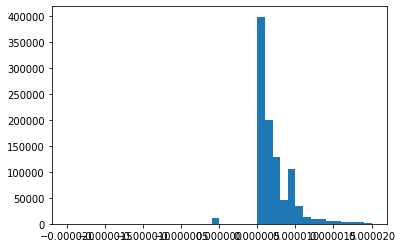

In [179]:
_ = plt.hist(second_guess_times, range=(-0.00002, 0.00002), bins=40)

We can compare the means of the two distributions.

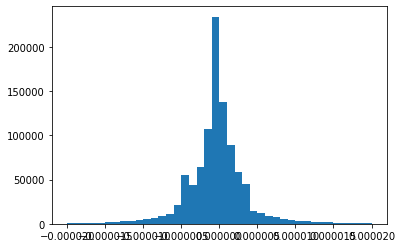

In [180]:
_ = plt.hist([first - second for first, second in zip(first_guess_times, second_guess_times)], range=(-0.00002, 0.00002), bins=40)

At first glance, it seems like we could just use the difference of means to guess the next character. However, we can assume that this naive comparison method is probably not in use.

## Built-In Timing

Instead of using the very simple timing method, let's use Python's built-in equality operator. First we run the string comparison for the wrong password.

In [151]:
guess_times = []

for i in range(100):
    
    start = timer()
    unknown_password == guess_password
    end = timer()
    
    guess_times += [end - start]

Now for the close password.

In [152]:
close_times = []

for i in range(100):
    
    start = timer()
    unknown_password == close_password
    end = timer()
    
    close_times += [end - start]

And plot the results.

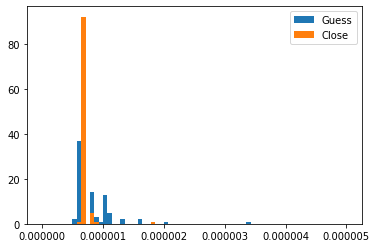

In [153]:
plt.hist(guess_times, range=(0, 5e-6), bins=70, label='Guess')
plt.hist(close_times, range=(0, 5e-6), bins=70, label='Close')

_ = plt.legend()

We can again compare the means of the two distributions.

In [154]:
print(f"Guess mean: {np.mean(guess_times)}")
print(f"Close mean: {np.mean(close_times)}")

Guess mean: 8.1100151874125e-07
Close mean: 7.169996388256549e-07


Now it seems like the difference is much more difficult to notice. In fact, the closer guess takes less time to compute, on average, sometimes! We need a better model to determine the difference between the two passwords.